In [338]:
from VelibData import VelibData
import missingno as msn
import pandas as pd
from matplotlib import pyplot as plt

In [339]:
velibData = VelibData()
stationsInfo = velibData.getStationsInfo()
stationsStatus = velibData.getStationsStatus()

In [340]:
stationsInfo.head(10)

,station_id,name,lat,lon,capacity,stationCode,rental_methods
0,213688169,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,16107,NaN
1,653222953,Mairie de Rosny-sous-Bois,48.871257,2.486581,30,31104,[CREDITCARD]
2,17278902806,Rouget de L'isle - Watteau,48.778193,2.396302,20,44015,NaN
3,36255,Toudouze - Clauzel,48.879296,2.337360,21,9020,[CREDITCARD]
4,37815204,Mairie du 12ème,48.840855,2.387555,30,12109,NaN
5,251039991,Cassini - Denfert-Rochereau,48.837526,2.336035,25,14111,[CREDITCARD]
6,85002689,Jourdan - Stade Charléty,48.819428,2.343335,60,14014,[CREDITCARD]
7,2515829865,Basilique,48.936269,2.358867,22,32017,[CREDITCARD]
8,516709288,Charonne - Robert et Sonia Delaunay,48.855908,2.392571,20,11104,NaN
9,120827885,Messine - Place Du Pérou,48.875448,2.315508,12,8026,[CREDITCARD]


In [341]:
stationsInfo = stationsInfo.fillna('Other')

In [342]:
stationsInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   station_id      1471 non-null   int64  
 1   name            1471 non-null   object 
 2   lat             1471 non-null   float64
 3   lon             1471 non-null   float64
 4   capacity        1471 non-null   int64  
 5   stationCode     1471 non-null   object 
 6   rental_methods  1471 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 80.6+ KB


In [343]:
stationsInfo.describe().T

,count,mean,std,min,25%,50%,75%,max
station_id,1471.0,1.419609e+09,3.898859e+09,6245.000000,6.208258e+07,2.059556e+08,6.530807e+08,1.852364e+10
lat,1471.0,4.885847e+01,3.080892e-02,48.764615,4.883769e+01,4.885869e+01,4.887950e+01,4.895143e+01
lon,1471.0,2.341030e+00,5.665025e-02,2.165597,2.302559e+00,2.343670e+00,2.378646e+00,2.538242e+00
capacity,1471.0,3.102583e+01,1.203009e+01,0.000000,2.300000e+01,2.900000e+01,3.700000e+01,7.400000e+01


<Axes: >

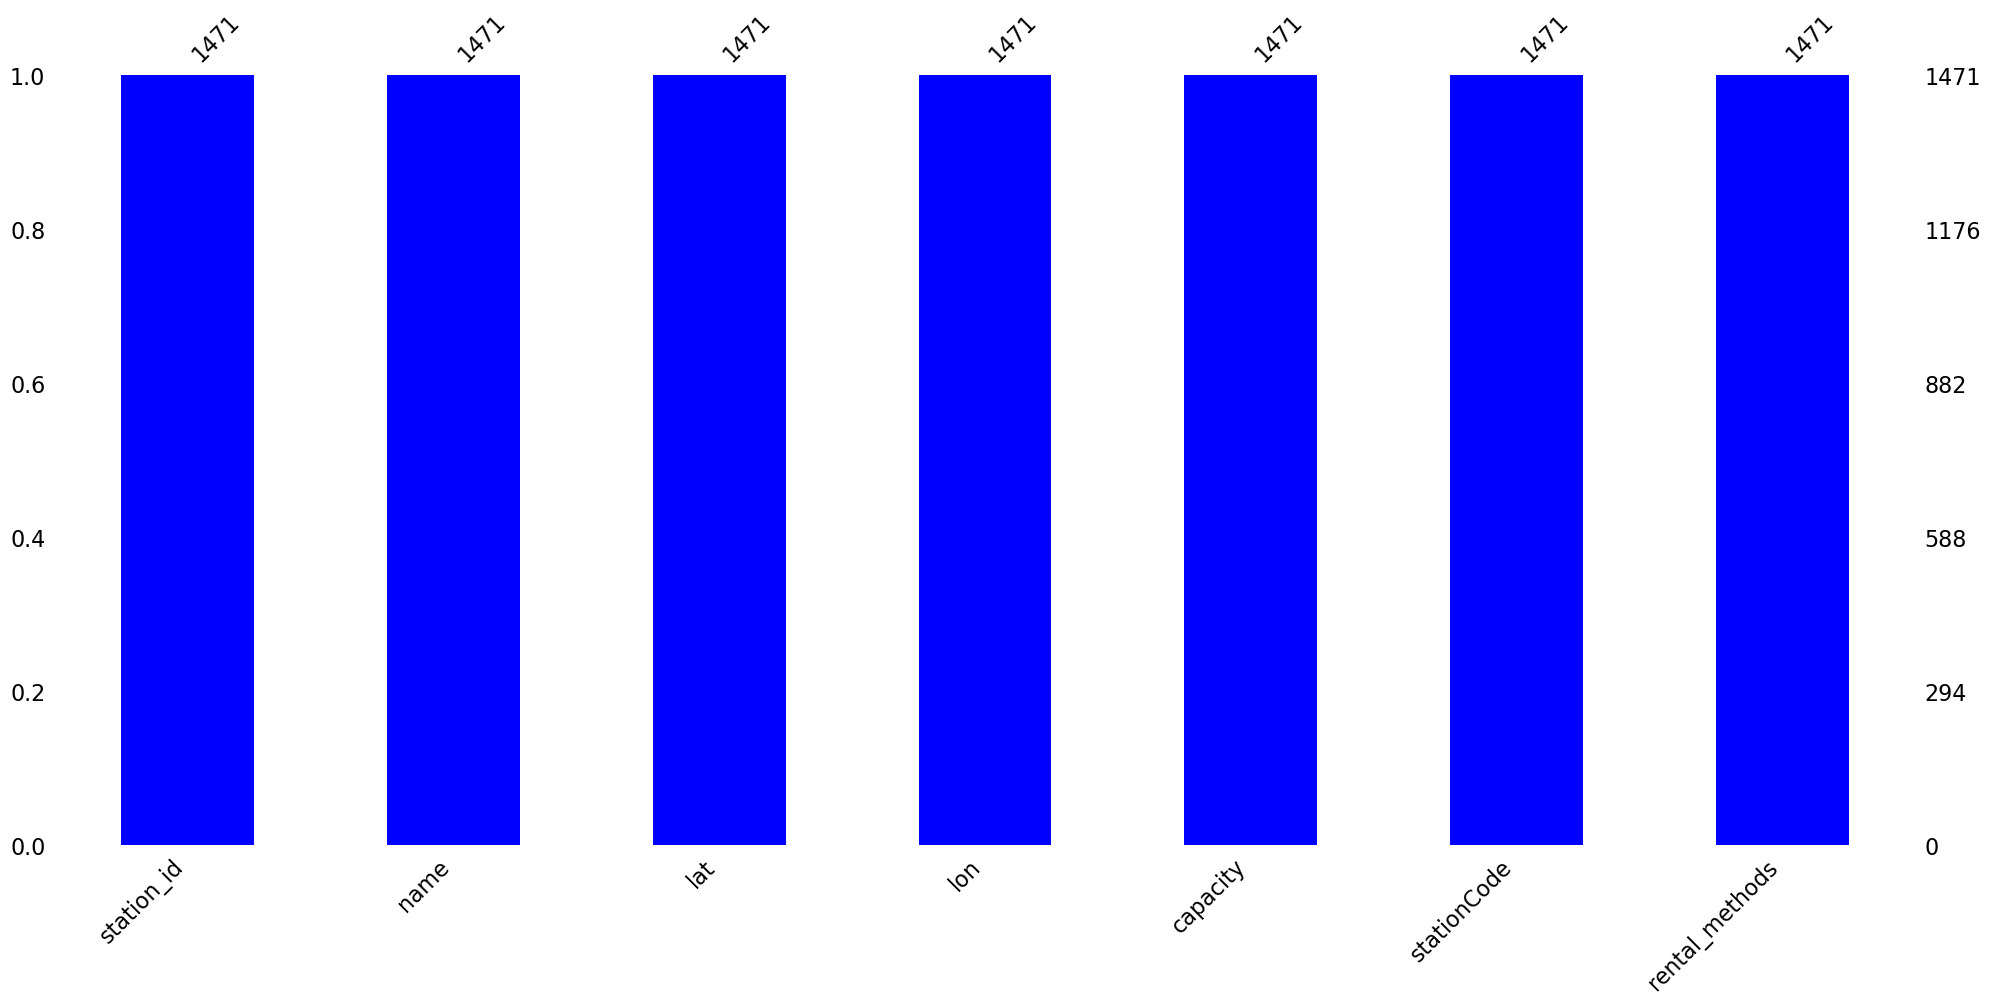

In [344]:
#check for missing values
msn.bar(stationsInfo, color = 'blue')

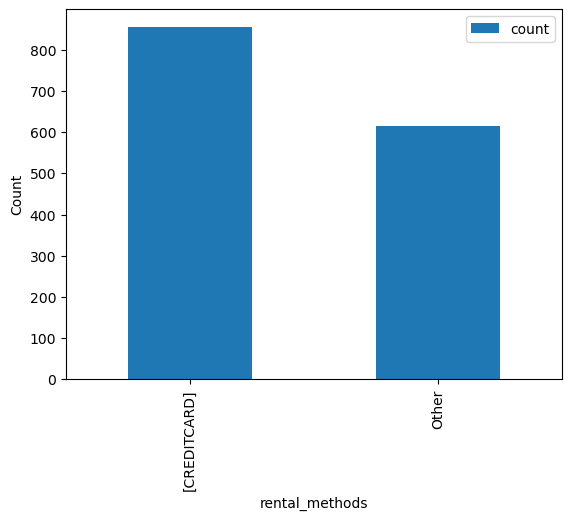

In [345]:
stationsInfo['rental_methods'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.legend()

c:\Users\BELKESSA\AppData\Local\anaconda3\envs\EDA\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:121: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


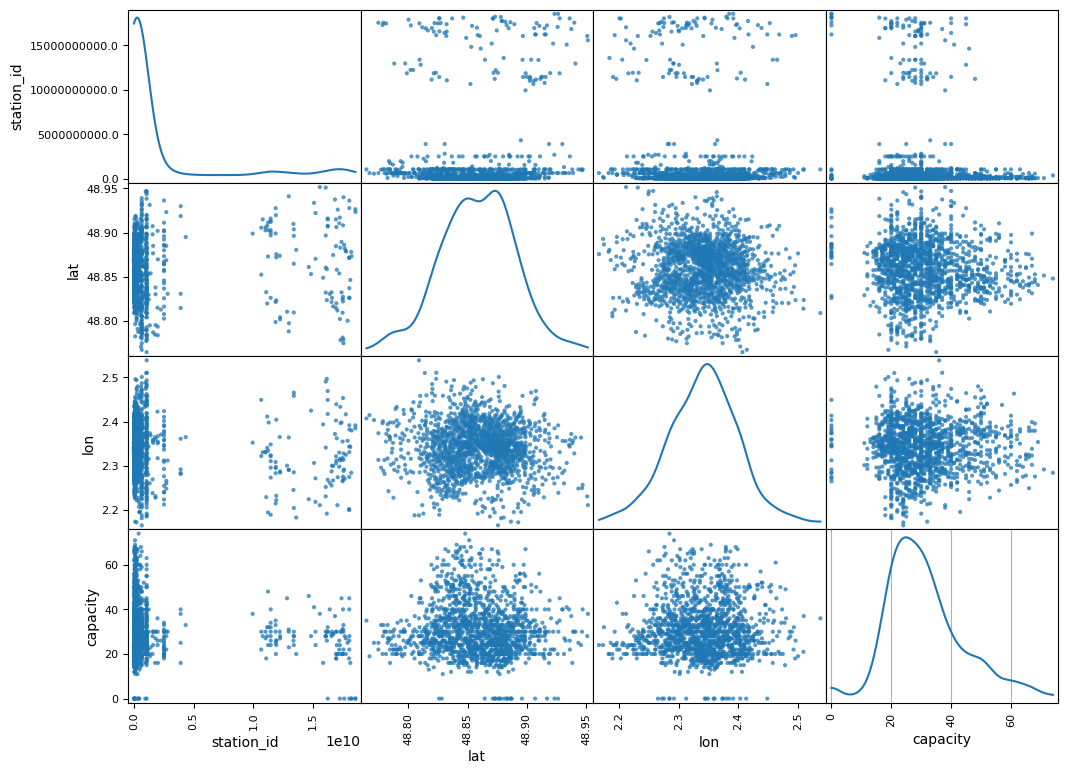

In [346]:
pd.plotting.scatter_matrix(stationsInfo, alpha = 0.75, figsize = (12, 9), diagonal = 'kde')
plt.grid()

In [347]:
import folium
folium_map = folium.Map(location=[48.866667,  2.333333],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

In [348]:
for index, row in stationsInfo.iterrows():
    capacity = (row["capacity"])
    radius = capacity/7
    if capacity>0:
        color="#6495ED" # blue
    else:
        color="#A9A9A9" # grey
    
    folium.CircleMarker(location=(row["lat"],
                                  row["lon"]),
                        radius=radius,
                        color=color,
                        fill=True,
                        tooltip=folium.map.Tooltip(str('Station :' + str(row['name']) + '\n'+ ',capacity : ' + str(row['capacity'])))).add_to(folium_map)

In [349]:
folium_map

In [350]:
stationsStatus.columns

Index(['stationCode', 'station_id', 'num_bikes_available', 'numBikesAvailable',
       'num_bikes_available_types', 'num_docks_available', 'numDocksAvailable',
       'is_installed', 'is_returning', 'is_renting', 'last_reported'],
      dtype='object')

In [351]:
stationsStatus = stationsStatus.drop(columns=['num_bikes_available', 'num_docks_available'])
stationsStatus

,stationCode,station_id,numBikesAvailable,num_bikes_available_types,numDocksAvailable,is_installed,is_returning,is_renting,last_reported
0,16107,213688169,5,"[{'mechanical': 4}, {'ebike': 1}]",29,1,1,1,1704709499
1,31104,653222953,15,"[{'mechanical': 10}, {'ebike': 5}]",15,1,1,1,1704709480
2,44015,17278902806,4,"[{'mechanical': 1}, {'ebike': 3}]",16,1,1,1,1704709218
3,9020,36255,5,"[{'mechanical': 2}, {'ebike': 3}]",16,1,1,1,1704709400
4,12109,37815204,1,"[{'mechanical': 0}, {'ebike': 1}]",27,1,1,1,1704709488
...,...,...,...,...,...,...,...,...,...
1466,12107,54000572,4,"[{'mechanical': 1}, {'ebike': 3}]",16,1,1,1,1704708985
1467,15122,384370499,2,"[{'mechanical': 2}, {'ebike': 0}]",22,1,1,1,1704709448
1468,8002,394404659,24,"[{'mechanical': 21}, {'ebike': 3}]",20,1,1,1,1704709231
1469,4005,516395829,9,"[{'mechanical': 8}, {'ebike': 1}]",4,1,1,1,1704709516


In [352]:
stationsStatus.describe().T

,count,mean,std,min,25%,50%,75%,max
station_id,1471.0,1.419609e+09,3.898859e+09,6.245000e+03,6.208258e+07,2.059556e+08,6.530807e+08,1.852364e+10
numBikesAvailable,1471.0,1.118831e+01,1.308707e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.800000e+01,7.800000e+01
numDocksAvailable,1471.0,1.929164e+01,1.372242e+01,0.000000e+00,7.500000e+00,1.900000e+01,2.800000e+01,6.600000e+01
is_installed,1471.0,9.938817e-01,7.800635e-02,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
is_returning,1471.0,9.660095e-01,1.812663e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
is_renting,1471.0,9.660095e-01,1.812663e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
last_reported,1471.0,1.703599e+09,1.219179e+07,1.523425e+09,1.704709e+09,1.704709e+09,1.704710e+09,1.704710e+09


In [353]:
stations_df = pd.merge(stationsStatus, stationsInfo, on='stationCode', how='inner', suffixes=('', '_df2')) 
stations_df = stations_df.drop(columns=['station_id_df2'], axis=1)
stations_df.head(10)

,stationCode,station_id,numBikesAvailable,num_bikes_available_types,numDocksAvailable,is_installed,is_returning,is_renting,last_reported,name,lat,lon,capacity,rental_methods
0,16107,213688169,5,"[{'mechanical': 4}, {'ebike': 1}]",29,1,1,1,1704709499,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,Other
1,31104,653222953,15,"[{'mechanical': 10}, {'ebike': 5}]",15,1,1,1,1704709480,Mairie de Rosny-sous-Bois,48.871257,2.486581,30,[CREDITCARD]
2,44015,17278902806,4,"[{'mechanical': 1}, {'ebike': 3}]",16,1,1,1,1704709218,Rouget de L'isle - Watteau,48.778193,2.396302,20,Other
3,9020,36255,5,"[{'mechanical': 2}, {'ebike': 3}]",16,1,1,1,1704709400,Toudouze - Clauzel,48.879296,2.337360,21,[CREDITCARD]
4,12109,37815204,1,"[{'mechanical': 0}, {'ebike': 1}]",27,1,1,1,1704709488,Mairie du 12ème,48.840855,2.387555,30,Other
5,14111,251039991,11,"[{'mechanical': 1}, {'ebike': 10}]",13,1,1,1,1704709549,Cassini - Denfert-Rochereau,48.837526,2.336035,25,[CREDITCARD]
6,14014,85002689,5,"[{'mechanical': 4}, {'ebike': 1}]",55,1,1,1,1704709255,Jourdan - Stade Charléty,48.819428,2.343335,60,[CREDITCARD]
7,32017,2515829865,7,"[{'mechanical': 4}, {'ebike': 3}]",11,1,1,1,1704709450,Basilique,48.936269,2.358867,22,[CREDITCARD]
8,11104,516709288,2,"[{'mechanical': 1}, {'ebike': 1}]",18,1,1,1,1704708992,Charonne - Robert et Sonia Delaunay,48.855908,2.392571,20,Other
9,8026,120827885,11,"[{'mechanical': 10}, {'ebike': 1}]",0,1,1,1,1704709199,Messine - Place Du Pérou,48.875448,2.315508,12,[CREDITCARD]
